In [94]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, confusion_matrix)

from sklearn.model_selection import GridSearchCV

In [2]:
#importing input data
data=pd.read_csv('water_potability.csv')

In [3]:
#finding out number of rows and columns in the data set
data.shape

(3276, 10)

In [4]:
#make a copy and retain the original dataset
df = data.copy()

In [5]:
df.shape

(3276, 10)

In [6]:
#sample records from top
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
#sample records from bottom
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Info shows all the attributes except Potability are of float type and that there are attributes with missing values.

In [17]:
df.duplicated().sum()

0

There are no row level duplicates in the dataset

In [14]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

ph, sulfate and Trihalomethanes attributes have missing values

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [20]:
#one way to handle missing values is to just drop those rows
df1 = df.dropna()

In [21]:
df1.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [46]:
#another way is to replace those missing values with the mean value 
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_clean = imp_mean.fit_transform(df)

In [47]:
df2 = pd.DataFrame(df_clean,columns=df.columns)

In [48]:
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [50]:
df2.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

There are no more missing values in the dataset now

In [49]:
df2['Potability'].value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

Potability has 1998 records with 0 value and 1278 with 1 as value.
So 1998 records are not fit for drinking and 1278 are sage for drinking.

In [51]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

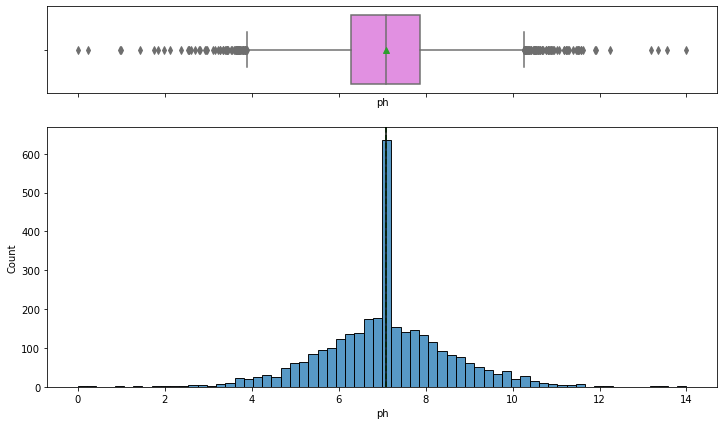

In [54]:
histogram_boxplot(df2, "ph")

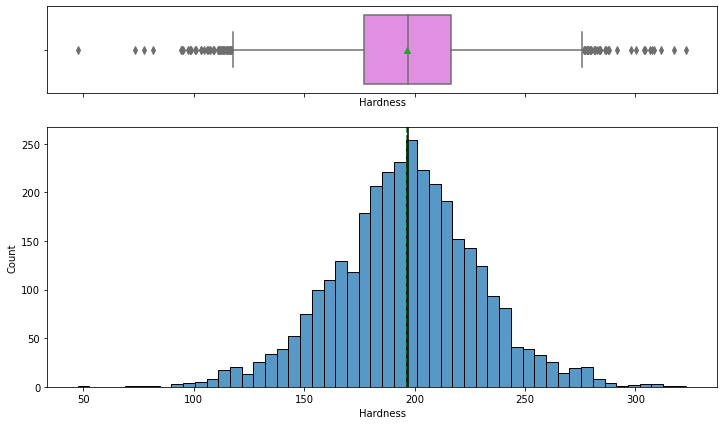

In [55]:
histogram_boxplot(df2, "Hardness")

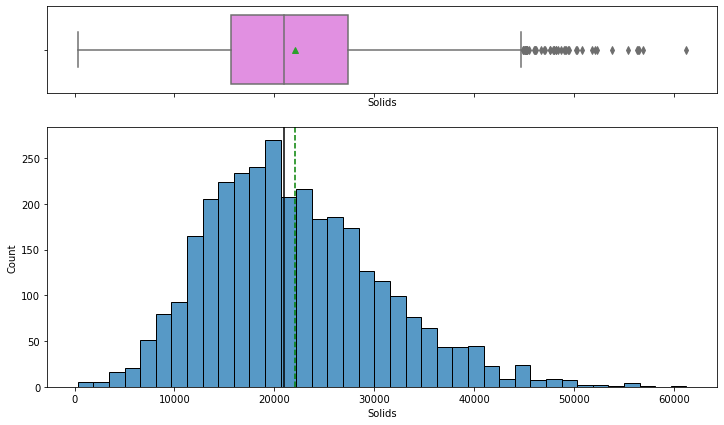

In [57]:
histogram_boxplot(df2, "Solids")

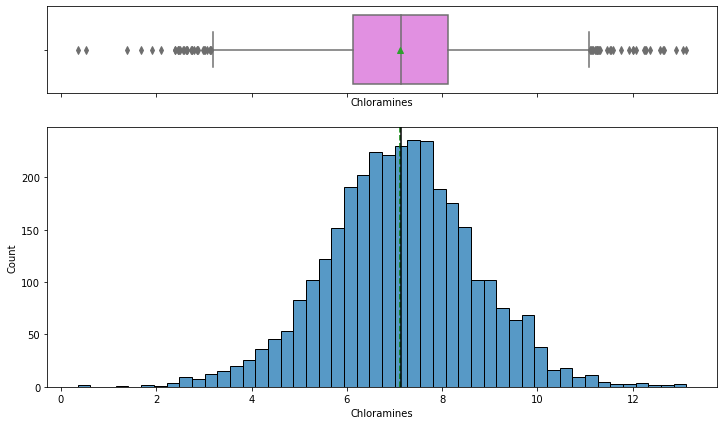

In [58]:
histogram_boxplot(df2, "Chloramines")

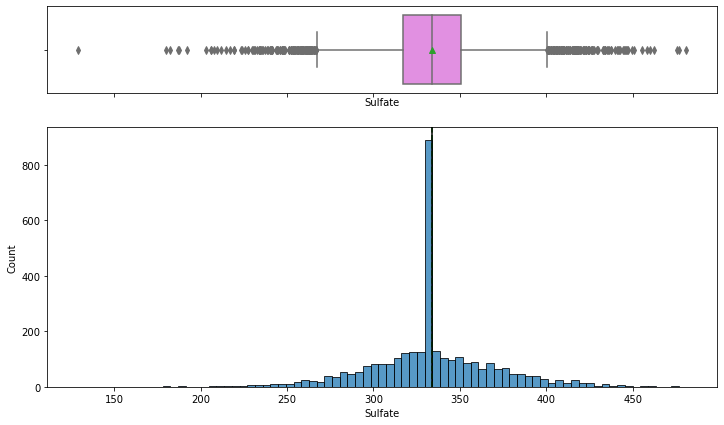

In [59]:
histogram_boxplot(df2, "Sulfate")

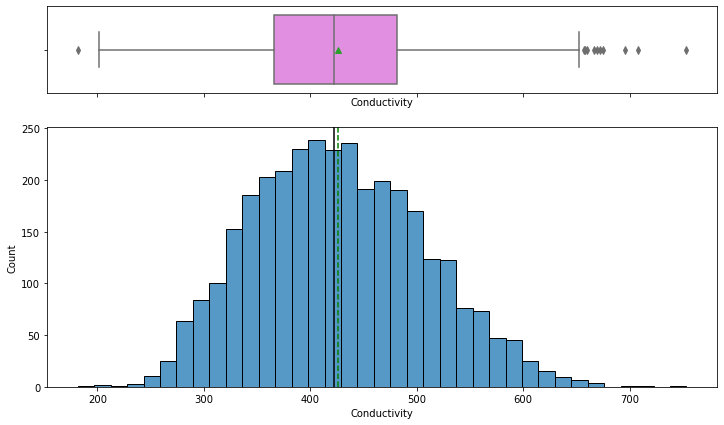

In [60]:
histogram_boxplot(df2, "Conductivity")

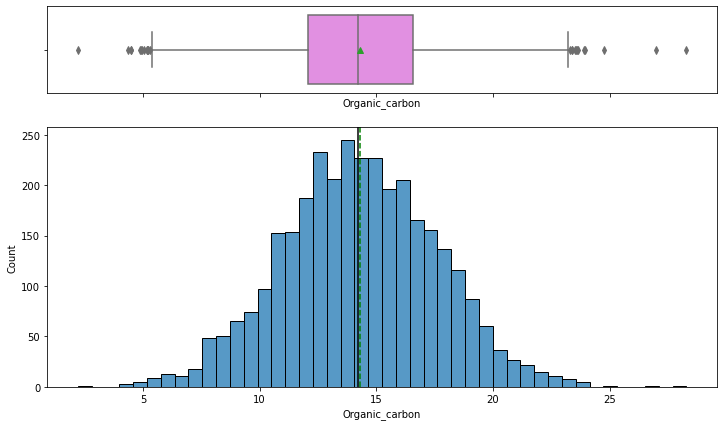

In [61]:
histogram_boxplot(df2, "Organic_carbon")

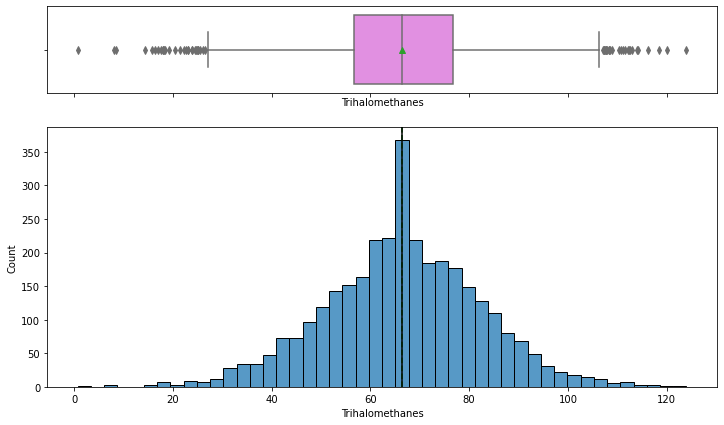

In [62]:
histogram_boxplot(df2, "Trihalomethanes")

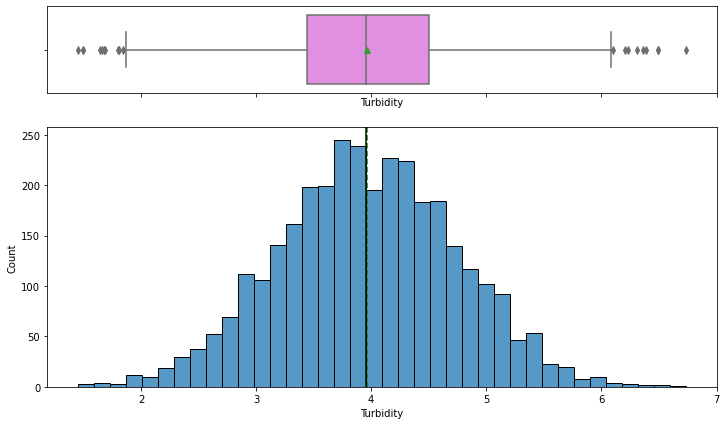

In [63]:
histogram_boxplot(df2, "Turbidity")

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

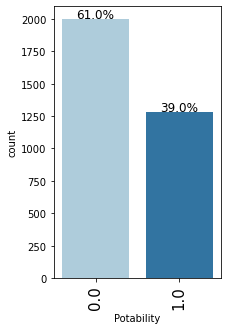

In [64]:
labeled_barplot(df2, "Potability", perc=True)

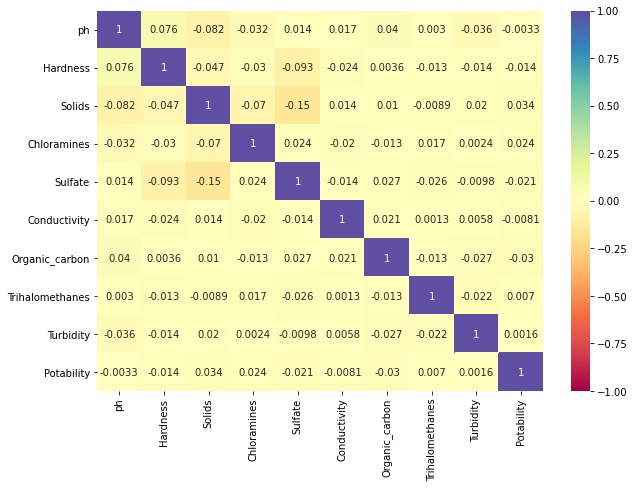

In [66]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(), annot = True, vmin = -1, vmax = +1, cmap = 'Spectral')
plt.show()

As per heatmap, there is no correlation between any of these attributes with Potability.

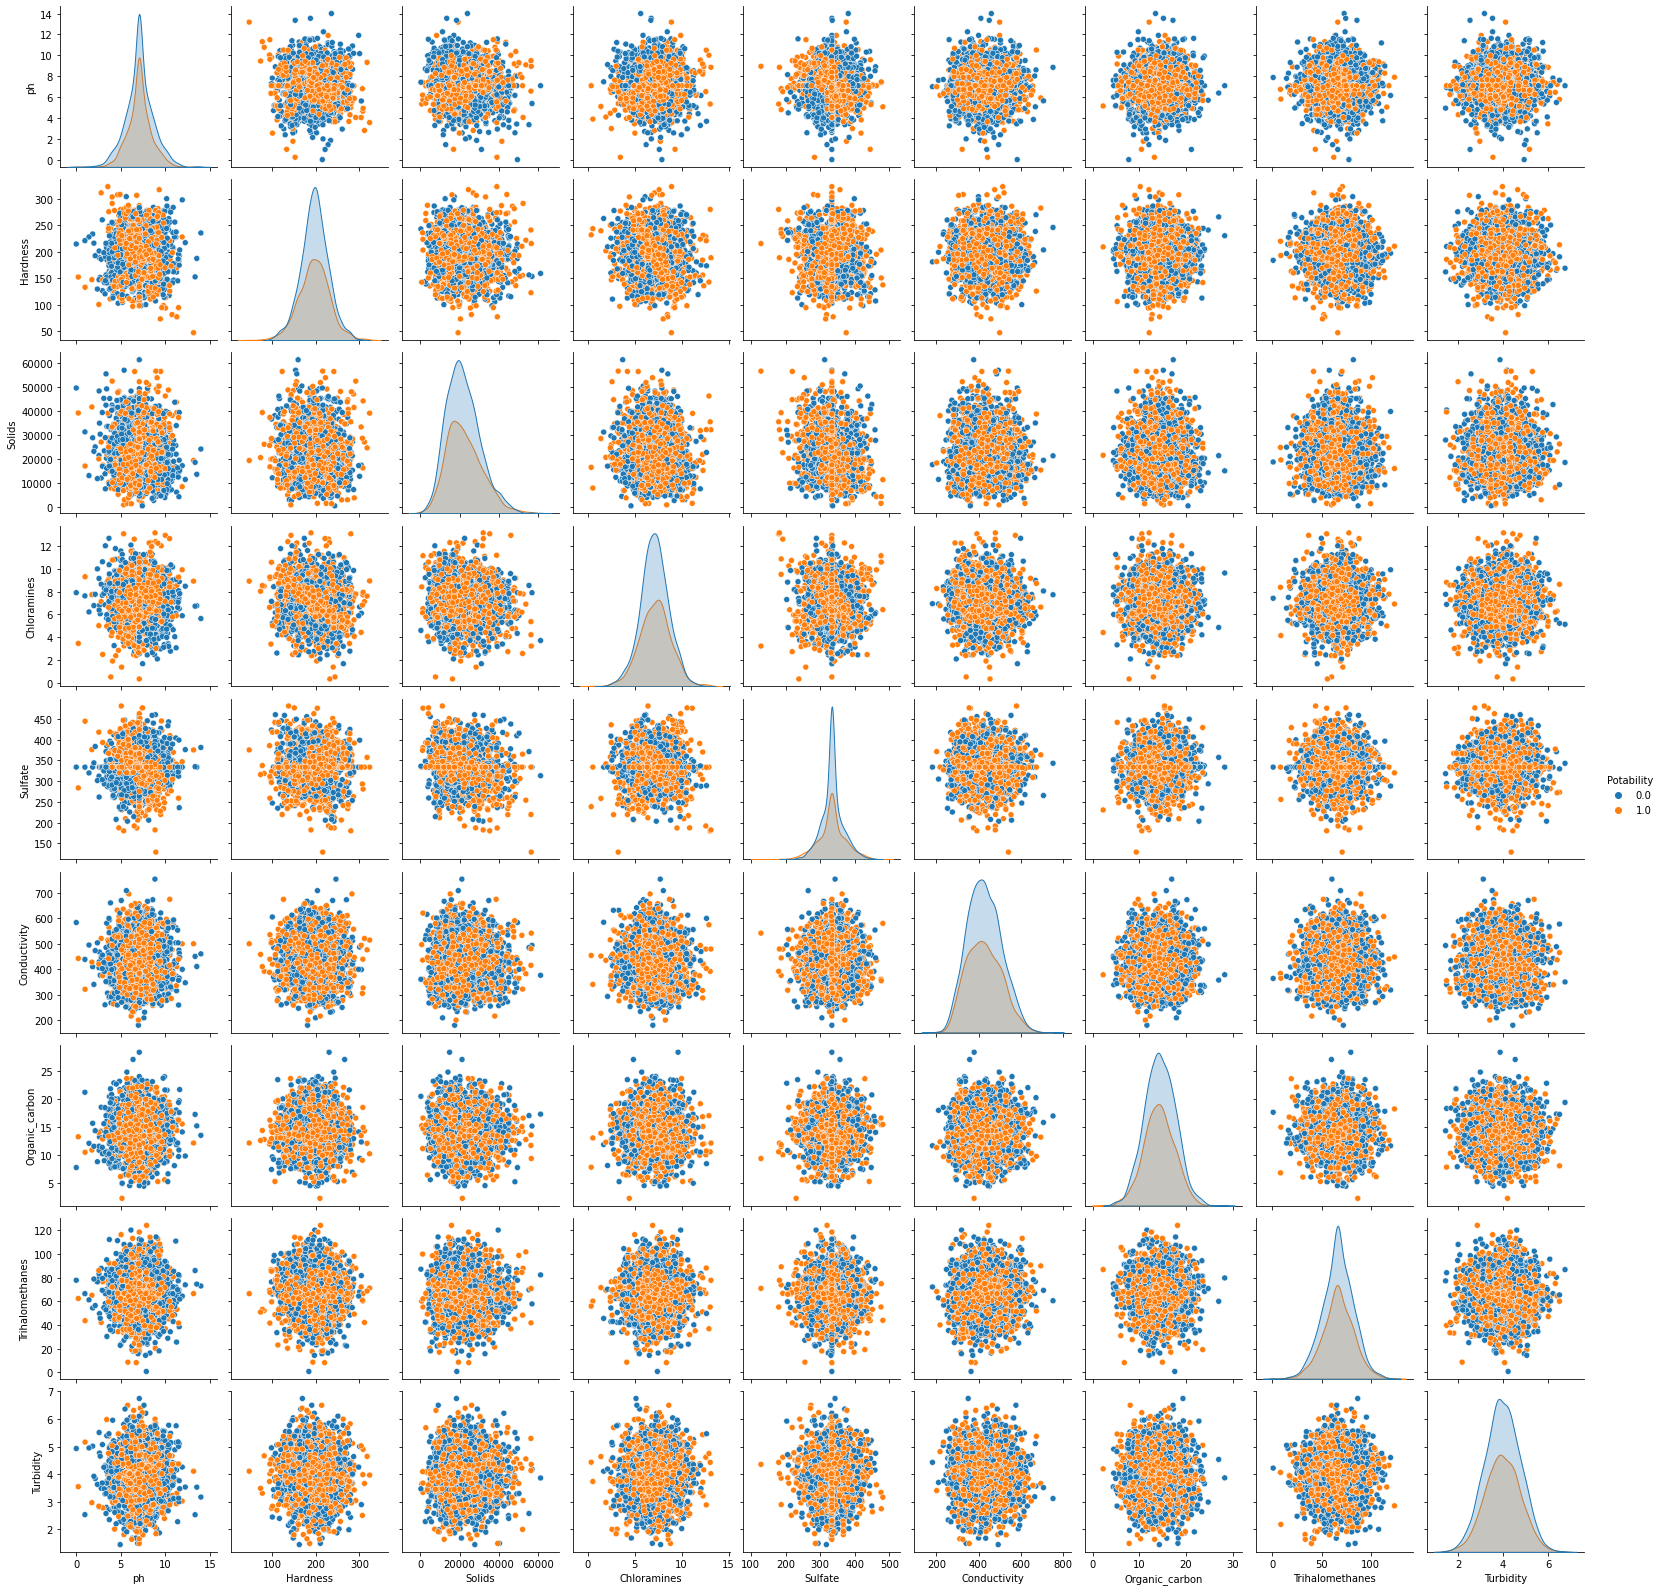

In [67]:
sns.pairplot(data = df2, hue = 'Potability')

<AxesSubplot:xlabel='ph', ylabel='Density'>

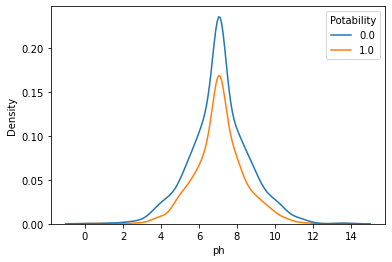

In [77]:
sns.kdeplot(data=df2,x='ph',hue='Potability')

In [79]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

In [81]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [82]:
X = df2.drop(['Potability'],axis=1)
y = df2['Potability']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [86]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2293, 9) (983, 9)
(2293,) (983,)


In [87]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [100]:
rf.score(X_train, y_train)

1.0

In [99]:
rf.score(X_test,y_test)

0.6856561546286877

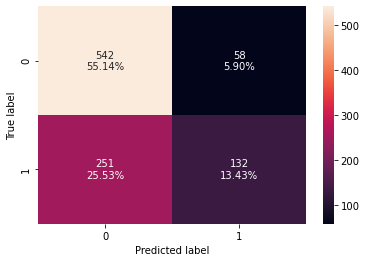

In [88]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [89]:
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [90]:
rf_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
print("Testing performance \n", rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.685656  0.344648   0.694737  0.460733


## Tuning Random Forest

In [103]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1, bootstrap=True)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [30, 70, 100],
    "max_depth": list(np.arange(5, 15, 5)),
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=70,
                       random_state=1)

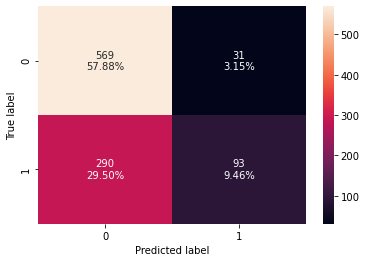

In [104]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [105]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance \n", rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.818142  0.535196   0.997917  0.696727


In [106]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance \n", rf_estimator_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.673449  0.24282       0.75  0.366864


Random forest with hyperparameter tuning gave an accuracy of 67.3%

In [109]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                      Imp
Sulfate          0.164519
ph               0.151687
Chloramines      0.119133
Solids           0.118212
Hardness         0.112087
Turbidity        0.086281
Organic_carbon   0.084813
Trihalomethanes  0.082080
Conductivity     0.081188


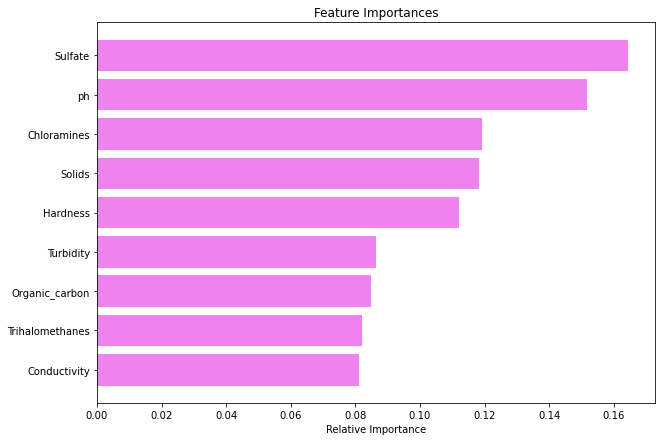

In [111]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## XGBoost 

In [112]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

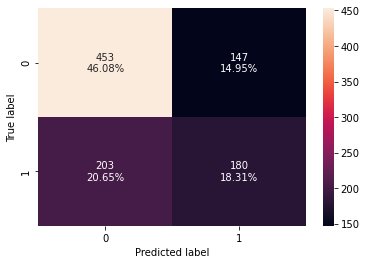

In [113]:
# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [114]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance \n", xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999128  0.997765        1.0  0.998881


In [115]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance \n", xgb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.643947  0.469974   0.550459  0.507042


With XGBoost, Accuracy on test data is 64%

### XG Boost Hyper parameter tuning

In [116]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 50, 100, 200],
    "scale_pos_weight": [1, 2],
    "subsample": [0.7, 1],
    "learning_rate": [0.05, 0.1, 0.4],
    "colsample_bytree": [0.7, 0.9],
    "colsample_bylevel": [0.5, 0.7],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

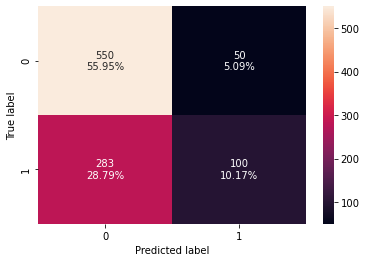

In [117]:
# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [118]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance \n", xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.774531  0.451397   0.939535  0.609811


In [119]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance \n", xgb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.661241  0.261097   0.666667  0.375235


With tuned hyperparameters, XG Boost gave an accuracy of 66.1% on Test data.

Random forest with hyperparameter tuning gave the better accuracy when compared to XG Boost. So i pick Random forest rf_tuned as the final model.